In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Load Data

In [21]:
# Load the consolidated dataset
data_path = Path('../data/processed/ppr_consolidated.parquet')
df = pd.read_parquet(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Dataset loaded successfully!
Shape: (752907, 12)
Memory usage: 247.2 MB
Memory usage: 247.2 MB


## 2. Basic Data Exploration

In [22]:
# Display first few rows
df.head(10)

,sale_date,address,county,eircode,price_eur,not_full_market_price,vat_exclusive,property_description,property_size_category,year,month,quarter
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,None,343000.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,None,185000.00,False,True,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,1,1
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,None,438500.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
3,2010-01-04,"1 The Haven, Mornington",Meath,None,400000.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,None,160000.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
5,2010-01-04,"12 Sallymount Avenue, Ranelagh",Dublin,None,425000.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
6,2010-01-04,"13 Oakleigh Wood, Dooradoyle, Limerick",Limerick,None,172500.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
7,2010-01-04,"13 The Drive, Chapelstown Gate, Tullow Road",Carlow,None,177500.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
8,2010-01-04,"15 Carriglawn, Waterpark, Carrigaline",Cork,None,180000.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1
9,2010-01-04,"15a Moore Bay, Kilkee",Clare,None,126500.00,False,False,Second-Hand Dwelling house /Apartment,None,2010,1,1


In [4]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752907 entries, 0 to 752906
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   sale_date               752907 non-null  datetime64[ns]
 1   address                 752907 non-null  object        
 2   county                  752907 non-null  object        
 3   eircode                 209920 non-null  object        
 4   price_eur               752907 non-null  float64       
 5   not_full_market_price   752907 non-null  bool          
 6   vat_exclusive           752907 non-null  bool          
 7   property_description    752907 non-null  object        
 8   property_size_category  52589 non-null   object        
 9   year                    752907 non-null  int32         
 10  month                   752907 non-null  int32         
 11  quarter                 752907 non-null  int32         
dtypes: bool(2), datetime64[ns](1),

In [5]:
# Statistical summary
df.describe()

,sale_date,price_eur,year,month,quarter
count,752907,752907.00,752907.00,752907.00,752907.00
mean,2019-04-02 16:05:57.118209792,309938.53,2018.71,7.03,2.66
min,2010-01-01 00:00:00,5001.00,2010.00,1.00,1.00
25%,2016-01-14 00:00:00,140000.00,2016.00,4.00,2.00
50%,2019-07-08 00:00:00,236123.00,2019.00,7.00,3.00
75%,2022-10-18 00:00:00,353000.00,2022.00,10.00,4.00
max,2025-11-07 00:00:00,387665198.00,2025.00,12.00,4.00
std,NaN,1180124.38,4.13,3.42,1.11


In [6]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

print("\nMissing Values:")
print(missing_df[missing_df['Missing Count'] > 0])


Missing Values:
                        Missing Count  Percentage
property_size_category         700318       93.02
eircode                        542987       72.12


## 3. Price Distribution Analysis

In [8]:
# Price statistics
print("Price Statistics:")
print(f"Mean: €{df['price_eur'].mean():,.2f}")
print(f"Median: €{df['price_eur'].median():,.2f}")
print(f"Std Dev: €{df['price_eur'].std():,.2f}")
print(f"Min: €{df['price_eur'].min():,.2f}")
print(f"Max: €{df['price_eur'].max():,.2f}")
print(f"\nPercentiles:")
print(df['price_eur'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

Price Statistics:
Mean: €309,938.53
Median: €236,123.00
Std Dev: €1,180,124.38
Min: €5,001.00
Max: €387,665,198.00

Percentiles:
0.10     75000.00
0.25    140000.00
0.50    236123.00
0.75    353000.00
0.90    515419.00
0.95    685000.00
0.99   1387665.95
Name: price_eur, dtype: float64


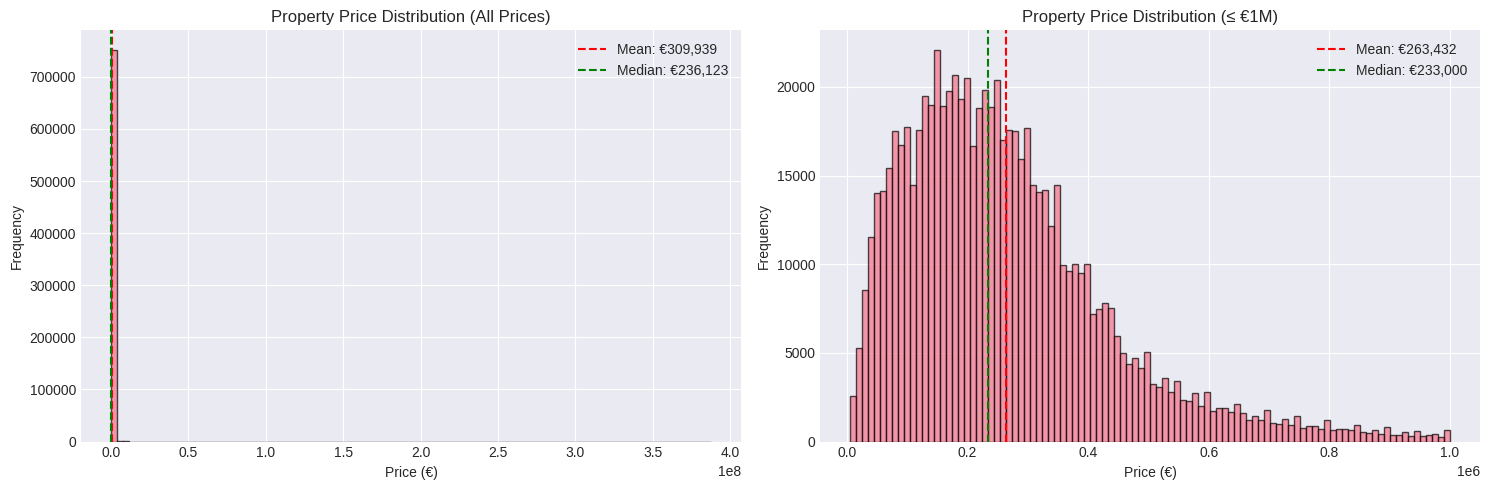

In [9]:
# Price distribution histogram
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# All prices
axes[0].hist(df['price_eur'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price (€)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Property Price Distribution (All Prices)')
axes[0].axvline(df['price_eur'].mean(), color='red', linestyle='--', label=f'Mean: €{df["price_eur"].mean():,.0f}')
axes[0].axvline(df['price_eur'].median(), color='green', linestyle='--', label=f'Median: €{df["price_eur"].median():,.0f}')
axes[0].legend()

# Prices under €1M (to see distribution better)
df_filtered = df[df['price_eur'] <= 1000000]
axes[1].hist(df_filtered['price_eur'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Price (€)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Property Price Distribution (≤ €1M)')
axes[1].axvline(df_filtered['price_eur'].mean(), color='red', linestyle='--', label=f'Mean: €{df_filtered["price_eur"].mean():,.0f}')
axes[1].axvline(df_filtered['price_eur'].median(), color='green', linestyle='--', label=f'Median: €{df_filtered["price_eur"].median():,.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

## 4. Time Series Analysis

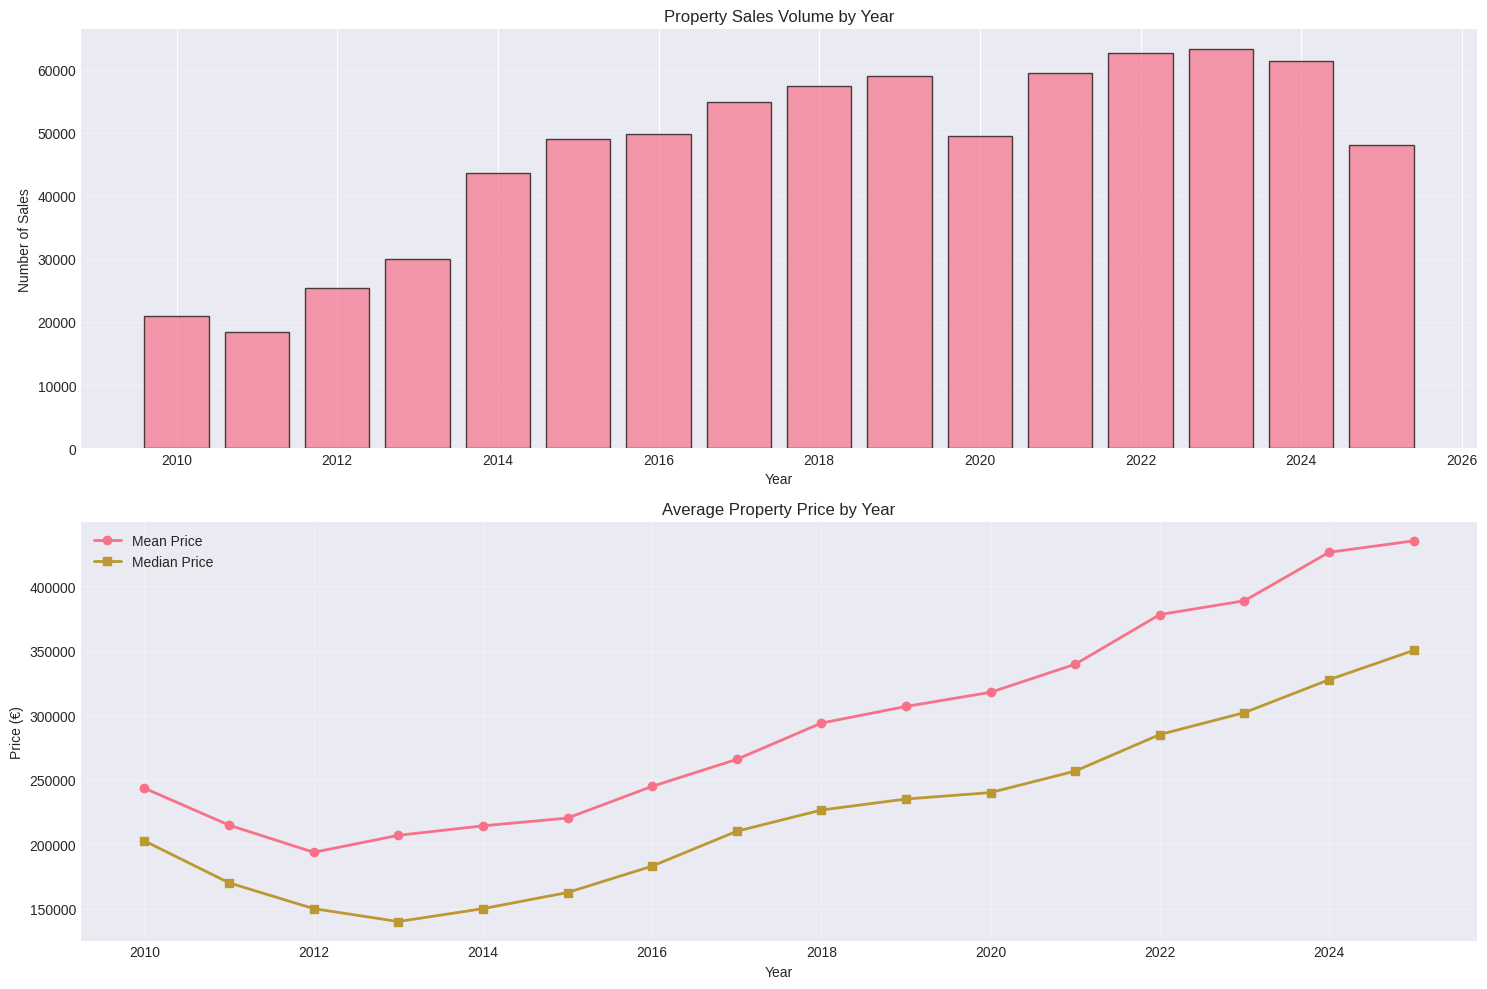


Yearly Statistics:
      Count  Mean Price  Median Price    Std Dev
year                                            
2010  20883   243382.27     202500.00  240297.65
2011  18408   214728.68     170000.00  234907.63
2012  25341   193682.67     150000.00  294932.06
2013  30051   206842.58     140000.00  773801.67
2014  43631   214209.55     150000.00  642071.67
2015  49093   220241.85     162500.00  428713.17
2016  49849   244824.30     183000.00  629293.40
2017  54941   265737.40     210000.00  389443.62
2018  57379   293881.78     226460.87 1085870.50
2019  58994   306780.47     235000.00 1272393.43
2020  49478   317749.02     240000.00 1498256.92
2021  59546   339498.16     256666.67 1234947.31
2022  62664   378003.96     285000.00 1348478.09
2023  63261   388710.33     302000.00 1385159.88
2024  61381   426297.61     327500.00 2141265.53
2025  48007   435162.03     350220.00 1329895.33


In [10]:
# Sales volume by year
yearly_sales = df.groupby('year').size()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Sales volume
axes[0].bar(yearly_sales.index, yearly_sales.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Sales')
axes[0].set_title('Property Sales Volume by Year')
axes[0].grid(axis='y', alpha=0.3)

# Average price by year
yearly_avg_price = df.groupby('year')['price_eur'].mean()
yearly_median_price = df.groupby('year')['price_eur'].median()

axes[1].plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linewidth=2, label='Mean Price')
axes[1].plot(yearly_median_price.index, yearly_median_price.values, marker='s', linewidth=2, label='Median Price')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price (€)')
axes[1].set_title('Average Property Price by Year')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nYearly Statistics:")
yearly_stats = df.groupby('year')['price_eur'].agg(['count', 'mean', 'median', 'std'])
yearly_stats.columns = ['Count', 'Mean Price', 'Median Price', 'Std Dev']
print(yearly_stats)

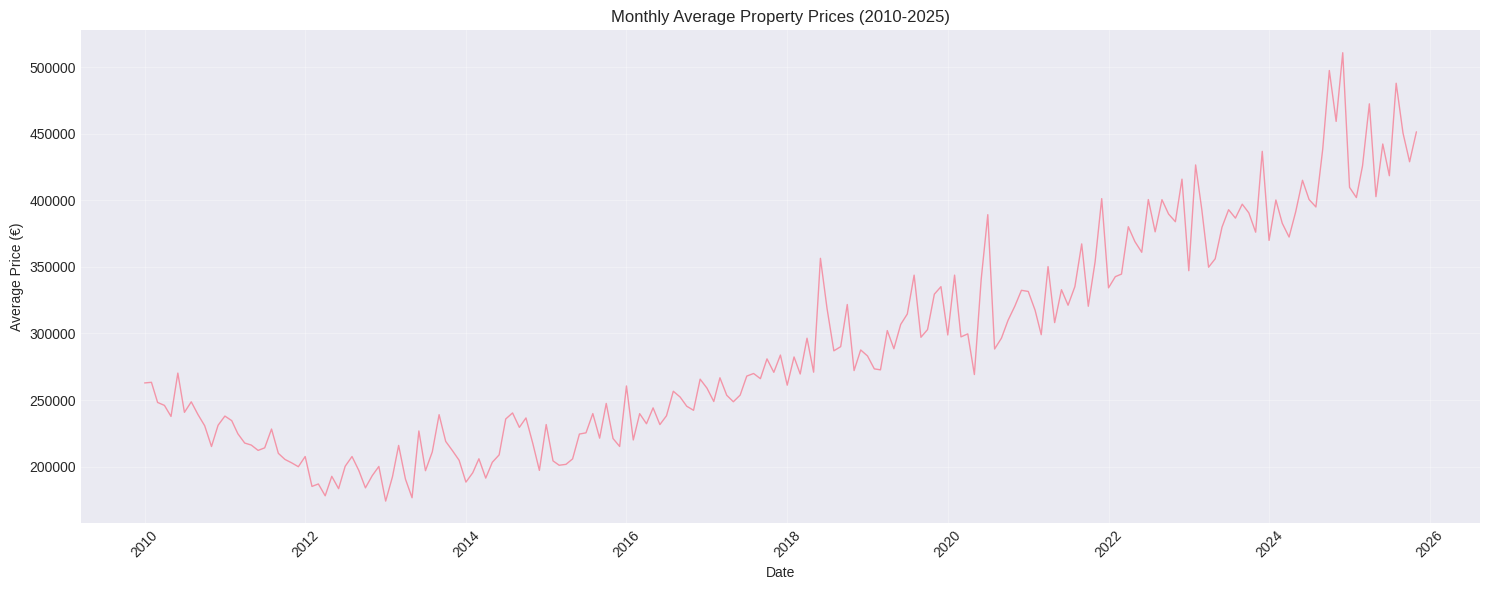

In [11]:
# Monthly trends
monthly_sales = df.groupby(['year', 'month']).agg({
    'price_eur': ['count', 'mean', 'median']
}).reset_index()
monthly_sales.columns = ['year', 'month', 'count', 'mean_price', 'median_price']
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(monthly_sales['date'], monthly_sales['mean_price'], linewidth=1, alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Average Price (€)')
ax.set_title('Monthly Average Property Prices (2010-2025)')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. County Analysis

In [12]:
# Sales by county
county_stats = df.groupby('county').agg({
    'price_eur': ['count', 'mean', 'median', 'std']
}).round(2)
county_stats.columns = ['Sales Count', 'Mean Price', 'Median Price', 'Std Dev']
county_stats = county_stats.sort_values('Sales Count', ascending=False)

print("\nTop 10 Counties by Sales Volume:")
print(county_stats.head(10))


Top 10 Counties by Sales Volume:
          Sales Count  Mean Price  Median Price    Std Dev
county                                                    
Dublin         236037   483823.56     346000.00 1854472.55
Cork            83070   268859.09     233000.00  567042.97
Kildare         40673   319574.83     287000.00  443731.85
Galway          36490   245515.68     210000.00  342577.20
Meath           31219   287016.75     263000.00  314606.08
Limerick        27734   211841.03     179000.00  332647.60
Wexford         26261   205046.83     177160.00  246068.19
Wicklow         25317   398387.70     320000.00 2516118.82
Louth           20855   228462.43     200000.00  318365.07
Kerry           20728   197890.47     160326.00  268816.14


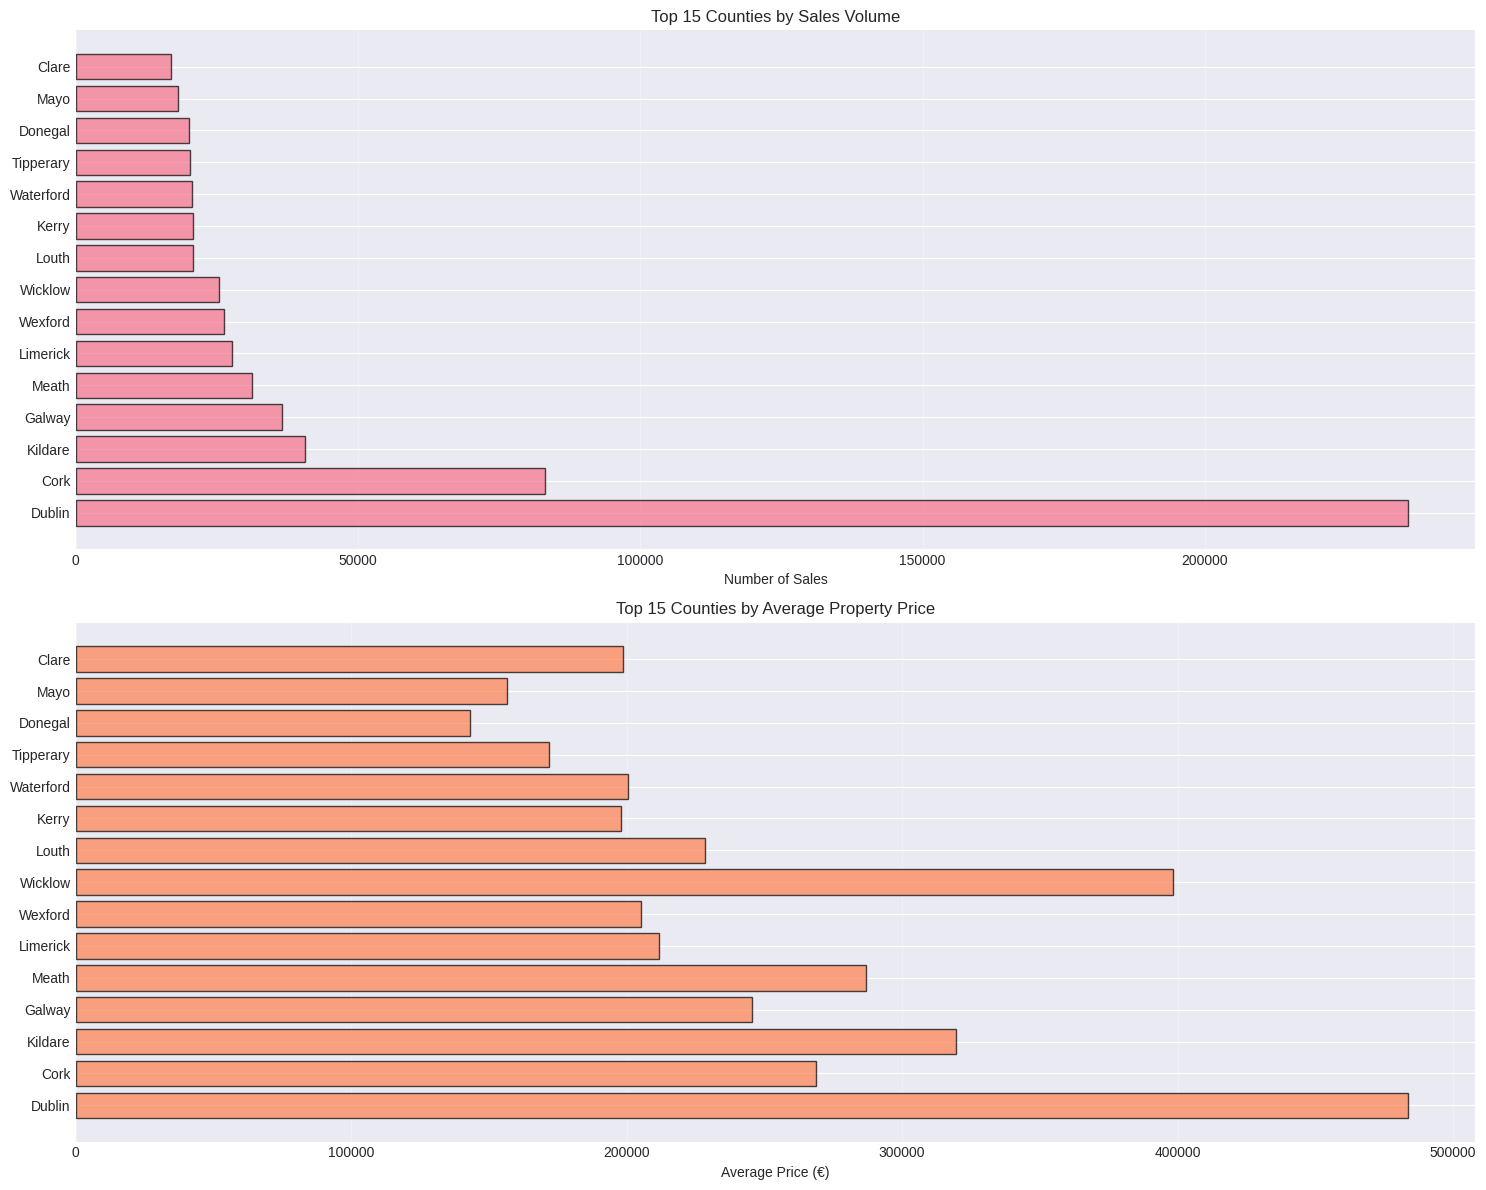

In [13]:
# Top 15 counties by sales volume
top_counties = county_stats.head(15)

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Sales volume
axes[0].barh(top_counties.index, top_counties['Sales Count'], edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Sales')
axes[0].set_title('Top 15 Counties by Sales Volume')
axes[0].grid(axis='x', alpha=0.3)

# Average prices
axes[1].barh(top_counties.index, top_counties['Mean Price'], edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Average Price (€)')
axes[1].set_title('Top 15 Counties by Average Property Price')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Property Type Analysis

In [15]:
# Property types
property_types = df['property_description'].value_counts()
print("\nProperty Types:")
print(property_types)

# Price by property type
property_price = df.groupby('property_description')['price_eur'].agg(['count', 'mean', 'median'])
property_price = property_price.sort_values('count', ascending=False)
print("\nPrice Statistics by Property Type:")
print(property_price)


Property Types:
property_description
Second-Hand Dwelling house /Apartment    622242
New Dwelling house /Apartment            130617
Teach/Árasán Cónaithe Atháimhe               44
Teach/Árasán Cónaithe Nua                     3
Teach/?ras?n C?naithe Nua                     1
Name: count, dtype: int64

Price Statistics by Property Type:
                                        count      mean    median
property_description                                             
Second-Hand Dwelling house /Apartment  622242 290574.17 220000.00
New Dwelling house /Apartment          130617 402186.80 295155.00
Teach/Árasán Cónaithe Atháimhe             44 321006.69 295000.00
Teach/Árasán Cónaithe Nua                   3 253318.46 315465.50
Teach/?ras?n C?naithe Nua                   1 115045.00 115045.00


/tmp/ipykernel_127001/256920806.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df_plot[df_plot['property_description'] == ptype]['price_eur'].dropna()


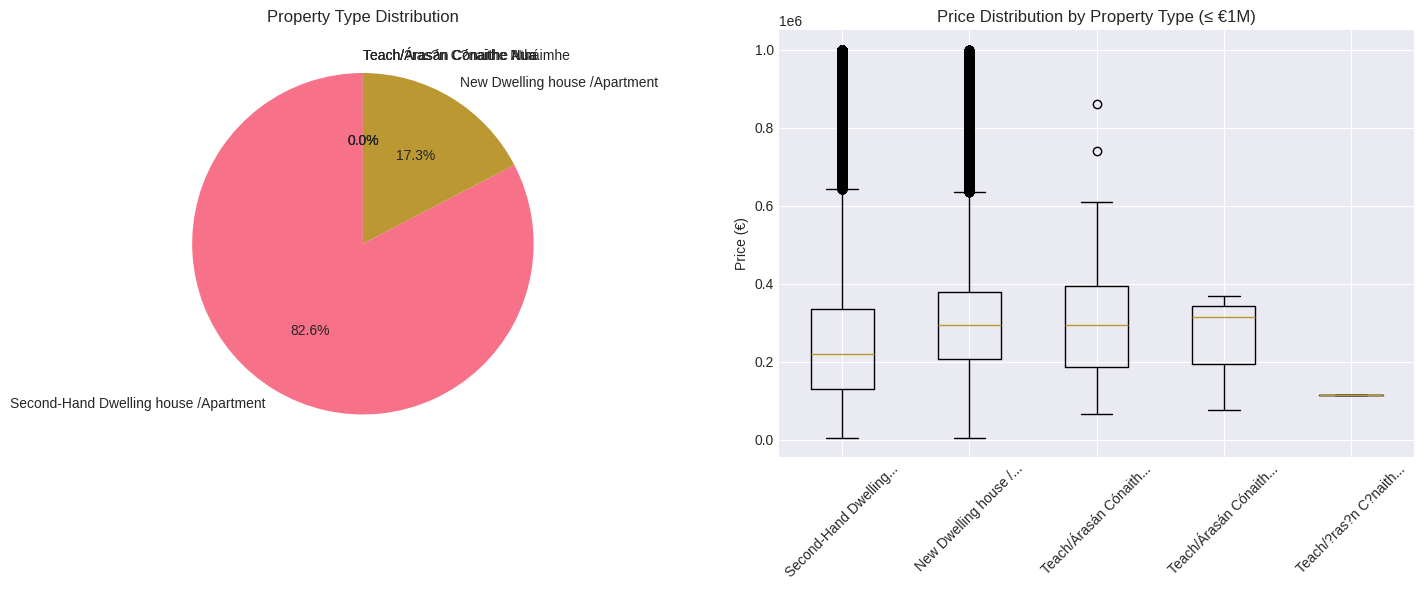

In [16]:
# Visualize property types
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
axes[0].pie(property_types.values, labels=property_types.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Property Type Distribution')

# Box plot of prices by property type
df_plot = df[df['price_eur'] <= 1000000].copy()  # Filter for better visualization
axes[1].boxplot([df_plot[df_plot['property_description'] == ptype]['price_eur'].dropna() 
                 for ptype in property_types.index], 
                labels=[ptype[:20] + '...' if len(ptype) > 20 else ptype for ptype in property_types.index])
axes[1].set_ylabel('Price (€)')
axes[1].set_title('Price Distribution by Property Type (≤ €1M)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Market Price Indicators

In [17]:
# Properties marked as 'Not Full Market Price'
market_price_dist = df['not_full_market_price'].value_counts()
print("\nFull Market Price Distribution:")
print(market_price_dist)
print(f"\nPercentage of non-market price sales: {(market_price_dist[True] / len(df) * 100):.2f}%")

# VAT Exclusive properties
vat_dist = df['vat_exclusive'].value_counts()
print("\nVAT Exclusive Distribution:")
print(vat_dist)
print(f"\nPercentage of VAT exclusive sales: {(vat_dist[True] / len(df) * 100):.2f}%")


Full Market Price Distribution:
not_full_market_price
False    714871
True      38036
Name: count, dtype: int64

Percentage of non-market price sales: 5.05%

VAT Exclusive Distribution:
vat_exclusive
False    624541
True     128366
Name: count, dtype: int64

Percentage of VAT exclusive sales: 17.05%


## 8. Recent Trends (Last 5 Years)

In [18]:
# Filter last 5 years
recent_df = df[df['year'] >= 2020].copy()

print(f"\nRecent Sales (2020-2025):")
print(f"Total sales: {len(recent_df):,}")
print(f"Average price: €{recent_df['price_eur'].mean():,.2f}")
print(f"Median price: €{recent_df['price_eur'].median():,.2f}")

# Yearly comparison
recent_yearly = recent_df.groupby('year')['price_eur'].agg(['count', 'mean', 'median'])
recent_yearly.columns = ['Sales', 'Mean Price', 'Median Price']
print("\nYearly Statistics (2020-2025):")
print(recent_yearly)


Recent Sales (2020-2025):
Total sales: 344,337
Average price: €381,231.71
Median price: €295,000.00

Yearly Statistics (2020-2025):
      Sales  Mean Price  Median Price
year                                 
2020  49478   317749.02     240000.00
2021  59546   339498.16     256666.67
2022  62664   378003.96     285000.00
2023  63261   388710.33     302000.00
2024  61381   426297.61     327500.00
2025  48007   435162.03     350220.00


## 9. Data Quality Check

In [19]:
# Check for anomalies
print("Data Quality Checks:")
print(f"\nNegative prices: {(df['price_eur'] < 0).sum()}")
print(f"Zero prices: {(df['price_eur'] == 0).sum()}")
print(f"Extremely high prices (>€10M): {(df['price_eur'] > 10000000).sum()}")
print(f"Extremely low prices (<€1000): {(df['price_eur'] < 1000).sum()}")

# Date range check
print(f"\nDate range: {df['sale_date'].min()} to {df['sale_date'].max()}")
print(f"Future dates: {(df['sale_date'] > pd.Timestamp.now()).sum()}")
print(f"Dates before 2010: {(df['sale_date'] < pd.Timestamp('2010-01-01')).sum()}")

Data Quality Checks:

Negative prices: 0
Zero prices: 0
Extremely high prices (>€10M): 415
Extremely low prices (<€1000): 0

Date range: 2010-01-01 00:00:00 to 2025-11-07 00:00:00
Future dates: 0
Dates before 2010: 0


## Summary

This notebook has explored the Irish Property Price Register dataset with:
- 752,907 property transactions
- Coverage from 2010 to 2025
- All 26 counties in Ireland
- Various property types and market conditions

**Key Findings:**
- The dataset provides comprehensive coverage of the Irish property market
- Clear trends in property prices over time
- Significant variation across counties
- Good data quality with minimal missing values

**Next Steps:**
1. Deep dive into specific counties or regions
2. Seasonal trend analysis
3. Price prediction modeling
4. Geographic analysis with mapping
5. Development of MCP server for natural language queries